# EDA Credit Case Study.

This case study aims to give us an idea of applying EDA in a real business scenario. In this case study, apart from applying the techniques that we have learnt in the EDA module, we will also develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers

### Problem Statement:

The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it as their advantage by becoming a defaulter. Suppose you work for a consumer finance company which specialises in lending various types of loans to urban customers. You have to use EDA to analyse the patterns present in the data. This will ensure that the applicants are capable of repaying the loan are not rejected.

This case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study. 

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

In [1]:
#importing the necessary libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
pd.set_option('display.max_colwidth',-1)
pd.set_option('display.max_info_columns',500)

#to view large outputs
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Data Sourcing

### Reading the Current Application File

In [3]:
application_data=pd.read_csv("application_data.csv")

In [4]:
application_data.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [5]:
application_data.shape

(307511, 122)

In [6]:
application_data.dtypes

SK_ID_CURR                      int64  
TARGET                          int64  
NAME_CONTRACT_TYPE              object 
CODE_GENDER                     object 
FLAG_OWN_CAR                    object 
FLAG_OWN_REALTY                 object 
CNT_CHILDREN                    int64  
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                 object 
NAME_INCOME_TYPE                object 
NAME_EDUCATION_TYPE             object 
NAME_FAMILY_STATUS              object 
NAME_HOUSING_TYPE               object 
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                      int64  
DAYS_EMPLOYED                   int64  
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                 int64  
OWN_CAR_AGE                     float64
FLAG_MOBIL                      int64  
FLAG_EMP_PHONE                  int64  
FLAG_WORK_PHONE                 int64  


In [7]:
# Count of Data Types of various columns
curr_dtypes = pd.DataFrame(application_data.dtypes.value_counts()).reset_index()
curr_dtypes.columns = ['dtypes', 'column count']
curr_dtypes



,dtypes,column count
0,float64,65
1,int64,41
2,object,16


In [8]:
application_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'], dtype='object', length=122)

In [9]:
application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
SK_ID_CURR                      307511 non-null int64
TARGET                          307511 non-null int64
NAME_CONTRACT_TYPE              307511 non-null object
CODE_GENDER                     307511 non-null object
FLAG_OWN_CAR                    307511 non-null object
FLAG_OWN_REALTY                 307511 non-null object
CNT_CHILDREN                    307511 non-null int64
AMT_INCOME_TOTAL                307511 non-null float64
AMT_CREDIT                      307511 non-null float64
AMT_ANNUITY                     307499 non-null float64
AMT_GOODS_PRICE                 307233 non-null float64
NAME_TYPE_SUITE                 306219 non-null object
NAME_INCOME_TYPE                307511 non-null object
NAME_EDUCATION_TYPE             307511 non-null object
NAME_FAMILY_STATUS              307511 non-null object
NAME_HOUSING_TYPE               307511 non-null object
REGION_

In [10]:
# Categorical data types description
application_data.loc[:, application_data.dtypes == np.object].describe()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
count,307511,307511,307511,307511,306219,307511,307511,307511,307511,211120,307511,307511,97216,153214,151170,161756
unique,2,3,2,2,7,8,5,6,6,18,7,58,4,3,7,2
top,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Laborers,TUESDAY,Business Entity Type 3,reg oper account,block of flats,Panel,No
freq,278232,202448,202924,213312,248526,158774,218391,196432,272868,55186,53901,67992,73830,150503,66040,159428


# Data Quality check

### Handling  Missing Values


In [11]:
#Print the null percentage of each column of application_data
app_na=round(100*(application_data.isnull().sum()/len(application_data.index)),2)
app_na.sort_values(ascending=False)

COMMONAREA_MEDI                 69.87
COMMONAREA_AVG                  69.87
COMMONAREA_MODE                 69.87
NONLIVINGAPARTMENTS_MODE        69.43
NONLIVINGAPARTMENTS_MEDI        69.43
NONLIVINGAPARTMENTS_AVG         69.43
FONDKAPREMONT_MODE              68.39
LIVINGAPARTMENTS_MEDI           68.35
LIVINGAPARTMENTS_MODE           68.35
LIVINGAPARTMENTS_AVG            68.35
FLOORSMIN_MEDI                  67.85
FLOORSMIN_MODE                  67.85
FLOORSMIN_AVG                   67.85
YEARS_BUILD_MEDI                66.50
YEARS_BUILD_AVG                 66.50
YEARS_BUILD_MODE                66.50
OWN_CAR_AGE                     65.99
LANDAREA_MODE                   59.38
LANDAREA_AVG                    59.38
LANDAREA_MEDI                   59.38
BASEMENTAREA_MEDI               58.52
BASEMENTAREA_AVG                58.52
BASEMENTAREA_MODE               58.52
EXT_SOURCE_1                    56.38
NONLIVINGAREA_MEDI              55.18
NONLIVINGAREA_AVG               55.18
NONLIVINGARE

In [12]:
#Getting the list of  columns with missing values greater than 47%
app_na_greater= app_na[round(100*(application_data.isnull().sum()/len(application_data.index)),2)>47].to_frame().index.tolist()
app_na_greater

['OWN_CAR_AGE',
 'EXT_SOURCE_1',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'TOTALAREA_MOD

In [13]:
#Dropping the columns with more than 47% data missing

application_data.drop( app_na_greater, axis =1, inplace=True)

In [14]:
application_data.shape

(307511, 73)

In [15]:
#appl_Nan_percent=round(100*(application_data.isnull().sum()/len(application_data.index)), 2)  #to be checked

In [16]:
#appl_Nan_percent = appl_Nan_percent[round(100*(application_data.isnull().sum()/len(application_data.index)), 2)>0]

In [17]:
#appl_Nan_percent

## Imputation
### Where NULL percentage is less than 1

Imputation for -NAME_TYPE_SUITE

In [18]:
#pd.options.display.float_format = '{:,.0f}'.format
print("***************Inspecting the count of column-wise NaNs in the column column: AMT_GOODS_PRICE******************")
print(application_data.AMT_GOODS_PRICE.isnull().sum())
print("*******************Checking column: AMT_GOODS_PRICE*************")
print(application_data.AMT_GOODS_PRICE.describe())

***************Inspecting the count of column-wise NaNs in the column column: AMT_GOODS_PRICE******************
278
*******************Checking column: AMT_GOODS_PRICE*************
count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64


*Suggestion for Imputation*

In [19]:
#application_data['AMT_GOODS_PRICE'].fillna(application_data['AMT_GOODS_PRICE'].median(),inplace=True)

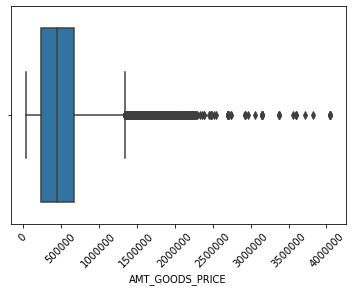

In [20]:
sns.boxplot(application_data.AMT_GOODS_PRICE)
plt.xticks(rotation=45)
plt.show()

Conclusion:There is difference between mean and median value (Median Value is less than mean value) and also, outliers are present and hence will impute the data with median value.

Imputation for -NAME_TYPE_SUITE

In [21]:
print("***************Inspecting the count of column-wise NaNs in the column: NAME_TYPE_SUITE******************")
print(application_data.NAME_TYPE_SUITE.isnull().sum())
print("*******************Checking column: NAME_TYPE_SUITE*************")
print(application_data.NAME_TYPE_SUITE.describe())

***************Inspecting the count of column-wise NaNs in the column: NAME_TYPE_SUITE******************
1292
*******************Checking column: NAME_TYPE_SUITE*************
count     306219       
unique    7            
top       Unaccompanied
freq      248526       
Name: NAME_TYPE_SUITE, dtype: object


*Suggestion for imputation*

In [22]:
#application_data['NAME_TYPE_SUITE'].fillna(application_data['NAME_TYPE_SUITE'].mode()[0],inplace=True)

Conclusion:: There are 7 unique values and out of which maximum are 'Unaccompanied' and hence will go with Mode option by imputing data with value 'Unaccompanied'.

EXT_SOURCE_2

In [23]:
print("***************Inspecting the count of column-wise NaNs in the column: EXT_SOURCE_2******************")
print(application_data.EXT_SOURCE_2.isnull().sum())
print("*******************Checking column: NAME_TYPE_SUITE*************")
print(application_data.EXT_SOURCE_2.describe())

***************Inspecting the count of column-wise NaNs in the column: EXT_SOURCE_2******************
660
*******************Checking column: NAME_TYPE_SUITE*************
count    3.068510e+05
mean     5.143927e-01
std      1.910602e-01
min      8.173617e-08
25%      3.924574e-01
50%      5.659614e-01
75%      6.636171e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64


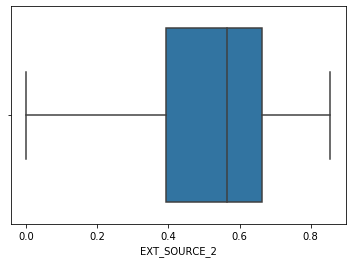

In [24]:
sns.boxplot(x=application_data['EXT_SOURCE_2'])
plt.show()

Conclusion: EXT_SOURCE_2: Not seeing much difference in mean and median value and also outliers are also not present. Hence will impute with mean value. 

### NULL percentage is around 13.5%

AMT_REQ_CREDIT_BUREAU_HOUR

In [25]:
# Check the details of columns by describing it and checking statistics
application_data[['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']].describe()


,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [26]:
#application_data[['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']]= application_data[['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK' ,'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']].fillna(value=0.0)

`Suggestion:` AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR have maximum rows with value 0 i.e. both mode and median is 0. Hence imputing such NULL columns with value 0.Also, 0 means no enquiries done.

### Considering the subset of the dataframe 

In [27]:
application_data.drop(['FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_EMAIL','FLAG_PHONE','FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR'],axis=1,inplace=True)

In [28]:
application_data.shape

(307511, 41)

### Standardising columns in Dataset

In [29]:
#converting DAYS_BIRTH to AGE in years make it more readable
application_data["AGE"]= application_data.DAYS_BIRTH.apply(lambda x : round(abs(x)/365,2))
application_data["EMPLOYED_YRS"]= application_data.DAYS_EMPLOYED.apply(lambda x : round(x/365,2))

In [30]:
#Drop the columns DAYS_BIRTH and 'DAYS_EMPLOYED'
application_data.drop(['DAYS_BIRTH','DAYS_EMPLOYED'],axis=1, inplace=True)

### Outliers Analysis

In [31]:
application_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AGE,EMPLOYED_YRS
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.068510e+05,246546.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-4986.120328,-2994.202373,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,5.143927e-01,0.510853,1.422245,0.143421,1.405292,0.100049,-962.858788,43.936976,174.836503
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,3522.886321,1509.450419,0.910682,0.509034,0.502737,3.265832,0.122126,0.219526,0.197499,0.268444,0.421124,0.383817,1.910602e-01,0.194844,2.400989,0.446698,2.379803,0.362291,826.808487,11.956135,387.058528
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-24672.000000,-7197.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.173617e-08,0.000527,0.000000,0.000000,0.000000,0.000000,-4292.000000,20.520000,-49.070000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-7479.500000,-4299.000000,2.000000,2.000000,2.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.924574e-01,0.370650,0.000000,0.000000,0.000000,0.000000,-1570.000000,34.010000,-7.560000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-4504.000000,-3254.000000,2.000000,2.000000,2.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.659614e-01,0.535276,0.000000,0.000000,0.000000,0.000000,-757.000000,43.150000,-3.320000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-2010.000000,-1720.000000,3.000000,2.000000,2.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.636171e-01,0.669057,2.000000,0.000000,2.000000,0.000000,-274.000000,53.920000,-0.790000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,0.000000,0.000000,20.000000,3.000000,3.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.549997e-01,0.896010,348.000000,34.000000,344.000000,24.000000,0.000000,69.120000,1000.670000


From above descrption it is clear that following columns may have Outliers, as their summary statistics sounds suspicious:
- CNT_CHILDREN
- EMPLOYED_YRS
- AMT_INCOME_TOTAL
- AMT_ANNUITY

CNT_CHILDREN : Count of the children in the family

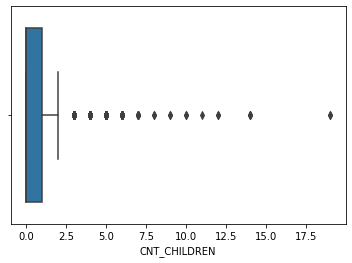

In [32]:
#Plotting the variable
sns.boxplot(x=application_data['CNT_CHILDREN'])
plt.show()

In [33]:
application_data.CNT_CHILDREN.value_counts()

0     215371
1     61119 
2     26749 
3     3717  
4     429   
5     84    
6     21    
7     7     
14    3     
19    2     
12    2     
10    2     
9     2     
8     2     
11    1     
Name: CNT_CHILDREN, dtype: int64

count    307511.000000
mean     174.836503   
std      387.058528   
min     -49.070000    
25%     -7.560000     
50%     -3.320000     
75%     -0.790000     
max      1000.670000  
Name: EMPLOYED_YRS, dtype: float64

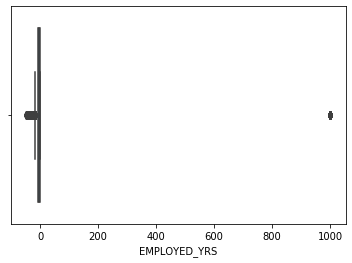

In [34]:
sns.boxplot(x=application_data['EMPLOYED_YRS'])
application_data.EMPLOYED_YRS.describe()

count    307499.000000
mean     27108.573909 
std      14493.737315 
min      1615.500000  
25%      16524.000000 
50%      24903.000000 
75%      34596.000000 
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

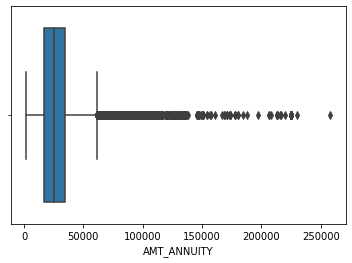

In [35]:
sns.boxplot(x=application_data['AMT_ANNUITY'])
application_data.AMT_ANNUITY.describe()

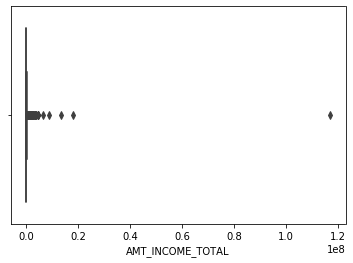

In [36]:
#Rechecking the columns
application_data.AMT_INCOME_TOTAL.describe()
sns.boxplot(x=application_data['AMT_INCOME_TOTAL'])


In [37]:
#Treating values outside 99%ile or 99.99%ile in each of the 3 variables
application_data=application_data[application_data.AMT_ANNUITY<np.nanpercentile(application_data['AMT_ANNUITY'], 99.99)]
application_data=application_data[application_data.CNT_CHILDREN<np.nanpercentile(application_data['CNT_CHILDREN'], 99.99)]
application_data=application_data[application_data.EMPLOYED_YRS<np.nanpercentile(application_data['EMPLOYED_YRS'], 99)]

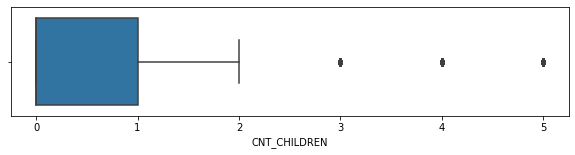

0    161880
1    59694 
2    26362 
3    3626  
4    413   
5    81    
Name: CNT_CHILDREN, dtype: int64

In [38]:
plt.figure(figsize=(10,2))
sns.boxplot(x=application_data['CNT_CHILDREN'])
plt.show()
application_data.CNT_CHILDREN.value_counts()

count    252056.000000
mean    -6.531712     
std      6.406390     
min     -49.070000    
25%     -8.700000     
50%     -4.510000     
75%     -2.100000     
max     -0.000000     
Name: EMPLOYED_YRS, dtype: float64

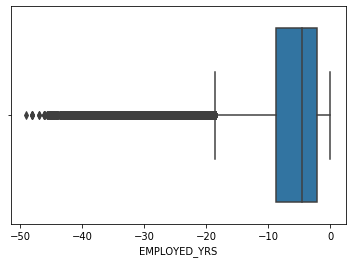

In [39]:
sns.boxplot(x=application_data['EMPLOYED_YRS'])
application_data.EMPLOYED_YRS.describe()

count    252056.000000
mean     27789.367389 
std      14491.527412 
min      1980.000000  
25%      17073.000000 
50%      25834.500000 
75%      35617.500000 
max      213160.500000
Name: AMT_ANNUITY, dtype: float64

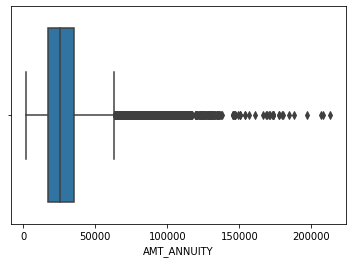

In [40]:
sns.boxplot(x=application_data['AMT_ANNUITY'])
application_data.AMT_ANNUITY.describe()

## Data Imbalance

##### 'Target variable' in the dataset ( 1 means clients with payment difficulties and 0 means all other cases) 

In [41]:
target_0=len(application_data[application_data.TARGET==0])
target_1=len(application_data[application_data.TARGET==1])
ratio_target=target_1/target_0

print(ratio_target)

0.09480085132259046


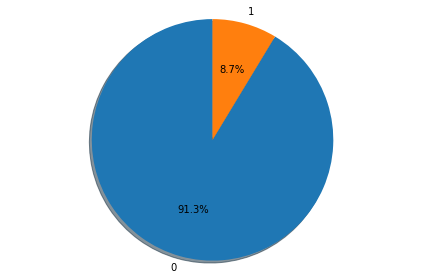

In [42]:
labels = [0,1]
sizes = [target_0,target_1]
fig1, ax1 = plt.subplots()
ax1.pie(sizes,labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

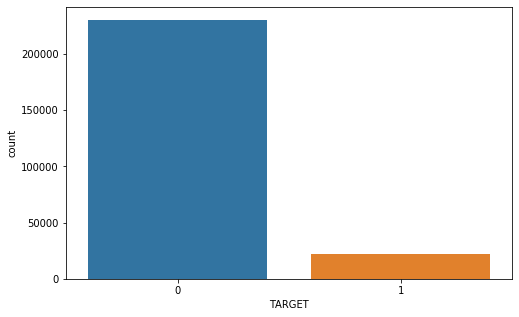

In [43]:
plt.figure(figsize=(8,5))
sns.countplot('TARGET',data=application_data)


### Binning of few columns:: AMT_INCOME_TOTAL and AGE

In [44]:
application_data.AMT_INCOME_TOTAL.describe()

count    2.520560e+05
mean     1.758051e+05
std      2.585088e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.575000e+05
75%      2.115000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [45]:
# Creating Binnned column for AMT_INCOME_TOTAL
application_data.AMT_INCOME_TOTAL.describe()
application_data.loc[:,'INCOME_GRADE']=pd.qcut(application_data.loc[:,'AMT_INCOME_TOTAL'],q=[0,0.20,0.50,0.90,1],
labels=['Low','Medium','High','Very_high'])

In [46]:
application_data.drop("AMT_INCOME_TOTAL", axis=1, inplace=True)

In [47]:
100*application_data.INCOME_GRADE.value_counts(normalize=True)

High         33.867871
Low          29.039579
Medium       27.290761
Very_high    9.801790 
Name: INCOME_GRADE, dtype: float64

It is evident from above that high INCOME_GRADE tend to apply for loans the most.

In [48]:
application_data.AGE.describe()

count    252056.000000
mean     40.463172    
std      10.034951    
min      20.520000    
25%      32.260000    
50%      39.930000    
75%      48.120000    
max      69.040000    
Name: AGE, dtype: float64

In [49]:
application_data['AGE_BY_DECADE'] = pd.cut(x=application_data['AGE'], bins=[20, 29, 39, 49, 59, 69], labels=['20s', '30s', '40s','50s','60s'])


In [50]:
application_data.drop("AGE", axis=1, inplace=True)

In [51]:
100*application_data.AGE_BY_DECADE.value_counts(normalize=True)

30s    32.042340
40s    30.540678
50s    19.331572
20s    14.780960
60s    3.304451 
Name: AGE_BY_DECADE, dtype: float64

About 32% of the applicants are in their 30s.

In [52]:
application_data.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,EMPLOYED_YRS,INCOME_GRADE,AGE_BY_DECADE
0,100002,1,Cash loans,M,N,Y,0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-3648.0,-2120,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,-1.75,High,20s
1,100003,0,Cash loans,F,N,N,0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-1186.0,-291,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,-3.25,High,40s
2,100004,0,Revolving loans,M,Y,Y,0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-4260.0,-2531,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,-0.62,Low,50s
3,100006,0,Cash loans,F,N,Y,0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-9833.0,-2437,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,-8.33,Medium,50s
4,100007,0,Cash loans,M,N,Y,0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-4311.0,-3458,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,-8.32,Medium,50s


### Splitting Data in two data set with TARGET=0 and TARGET=1 for Data Analysis

Target=1 means defaulters.

Target=0 means non defaulters.

In [53]:
app_data_t0 = application_data[application_data.TARGET==0]
app_data_t1 = application_data[application_data.TARGET==1]

##### Univariate Analysis: TAGET 0 and TARGET 1 for categorical variables

In [54]:
def func_plot(feature):
    plt.figure(figsize=(20,5))
    plt.subplot(1, 2, 1)   
    ax=sns.countplot(feature, data=app_data_t0,color='green')
    total = len(app_data_t0['%s' %feature])    
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))       
    plt.title('Plot of '+ '%s' %feature +' for Non-Defaulters', fontsize=14)
    plt.xlabel(feature)
    plt.xticks(rotation=90)
    plt.ylabel('No. of cases for non-defaulters')
    plt.subplot(1, 2, 2)
    ax=sns.countplot(feature, data=app_data_t1,color='blue')
    total = len(app_data_t1['%s' %feature])    
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))   
    plt.title('Plot of '+ '%s' %feature +' for Defaulters', fontsize=14)
    plt.xlabel(feature)
    plt.xticks(rotation=90)
    plt.ylabel('No. of cases for defaulters')
    plt.show()    

In [55]:
# Categorical data types description
application_data.loc[:, application_data.dtypes == np.object].describe()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE
count,252056,252056,252056,252056,250960,252056,252056,252056,252056,211050,252056,252056
unique,2,3,2,2,7,7,5,6,6,18,7,57
top,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Laborers,TUESDAY,Business Entity Type 3
freq,226166,157139,157679,171034,204954,158738,173250,163855,220409,55178,43938,67975


In [56]:
application_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,EMPLOYED_YRS
count,252056.000000,252056.000000,252056.000000,2.520560e+05,252056.000000,2.518000e+05,252056.000000,252056.000000,252056.000000,252054.000000,252056.000000,252056.000000,252056.000000,252056.000000,252056.000000,252056.000000,252056.000000,252056.000000,252056.000000,2.515520e+05,202177.000000,251207.000000,251207.000000,251207.000000,251207.000000,252055.000000,252056.000000
mean,278121.859246,0.086592,0.497322,6.112136e+05,27789.367389,5.492159e+05,0.020893,-4635.496596,-2800.526125,2.251315,2.044677,2.023396,12.203149,0.017222,0.061891,0.049568,0.089762,0.281057,0.218979,5.161184e-01,0.500331,1.415932,0.139964,1.398870,0.097672,-971.098518,-6.531712
std,102815.689040,0.281237,0.756025,4.061194e+05,14491.527412,3.727931e+05,0.013871,3252.223491,1515.347895,0.936353,0.512345,0.506376,3.299812,0.130099,0.240958,0.217052,0.285841,0.449516,0.413555,1.899275e-01,0.196012,2.400201,0.441956,2.378688,0.358178,827.316019,6.406390
min,100002.000000,0.000000,0.000000,4.500000e+04,1980.000000,4.050000e+04,0.000290,-22928.000000,-7197.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.173617e-08,0.000527,0.000000,0.000000,0.000000,0.000000,-4292.000000,-49.070000
25%,189045.500000,0.000000,0.000000,2.779695e+05,17073.000000,2.475000e+05,0.010006,-6952.000000,-4177.000000,2.000000,2.000000,2.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.982637e-01,0.357293,0.000000,0.000000,0.000000,0.000000,-1578.000000,-8.700000
50%,278070.500000,0.000000,0.000000,5.212800e+05,25834.500000,4.500000e+05,0.018850,-4265.000000,-2886.000000,2.000000,2.000000,2.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.670355e-01,0.522697,0.000000,0.000000,0.000000,0.000000,-763.000000,-4.510000
75%,367172.500000,0.000000,1.000000,8.288370e+05,35617.500000,6.930000e+05,0.028663,-1845.000000,-1487.000000,3.000000,2.000000,2.000000,15.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,6.638855e-01,0.657784,2.000000,0.000000,2.000000,0.000000,-288.000000,-2.100000
max,456255.000000,1.000000,5.000000,4.050000e+06,213160.500000,4.050000e+06,0.072508,0.000000,0.000000,7.000000,3.000000,3.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.549997e-01,0.893976,348.000000,34.000000,344.000000,24.000000,0.000000,-0.000000


##### Unordered Categorical Data

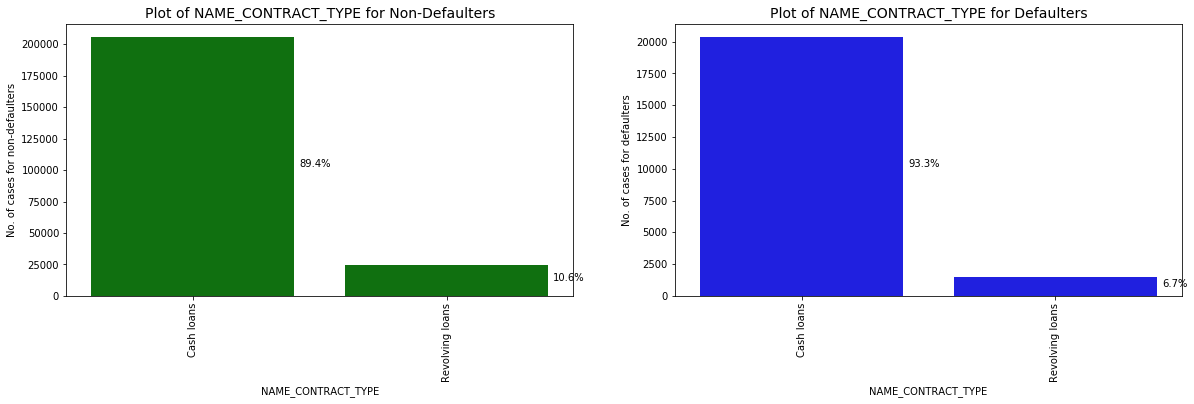

In [57]:
func_plot('NAME_CONTRACT_TYPE')

`Conclusion`: 
1. Contract type :: Revolving loans are just a small fraction from the total number of loans in both the scenarios 0 and 1. <br>
2. Revolving Loan proportion is less in defaulters dataset as compared to other group i.e. Non Defaulters.People who tend to default i.e; Target 1 group, have lower proportion of 'Revolving loans' as compared to those in the other group. 

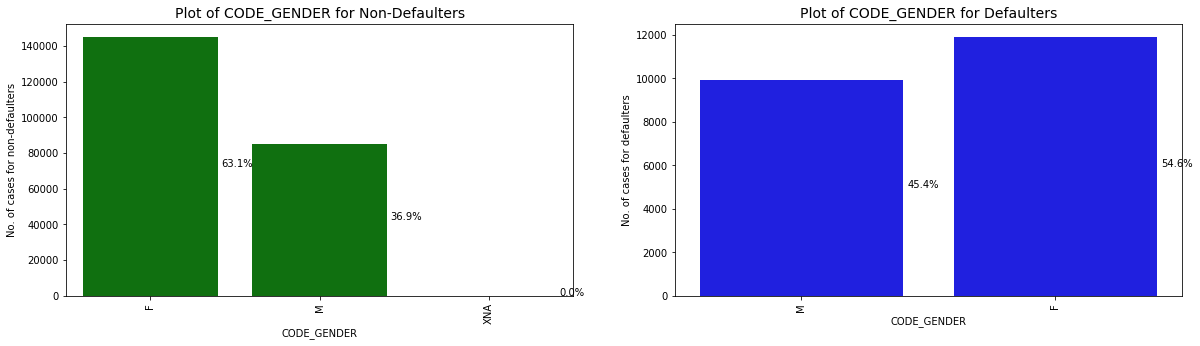

In [58]:
func_plot('CODE_GENDER')   

` Conclusion`: 
1. Female candidates are more in both the scenarios i.e in both dataset 0 and 1.
2. Looking at default dataset plot, it is very much clear chances of not returning loan amt is more if candidate is Male. 

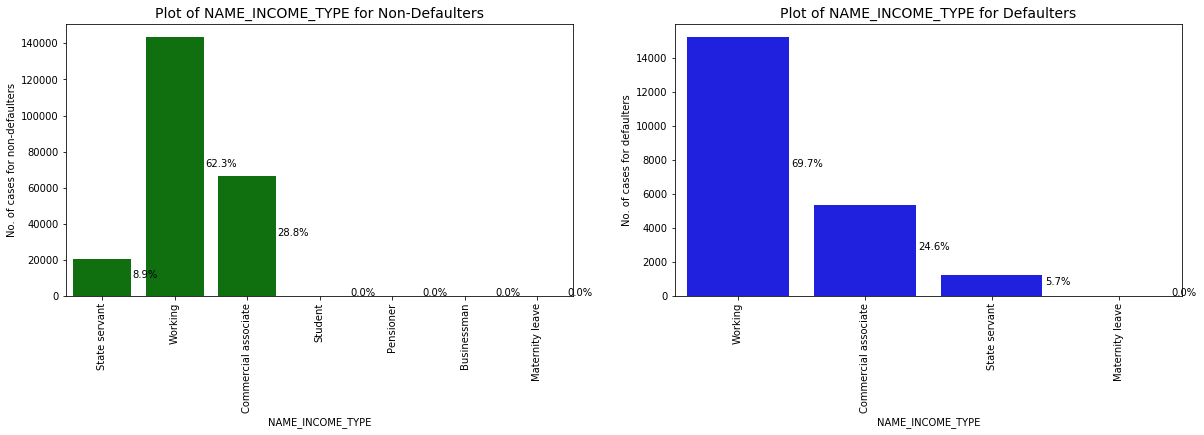

In [59]:
func_plot('NAME_INCOME_TYPE') 

`Conclusion:`<br>
Most of the defaulters are Working professionals.

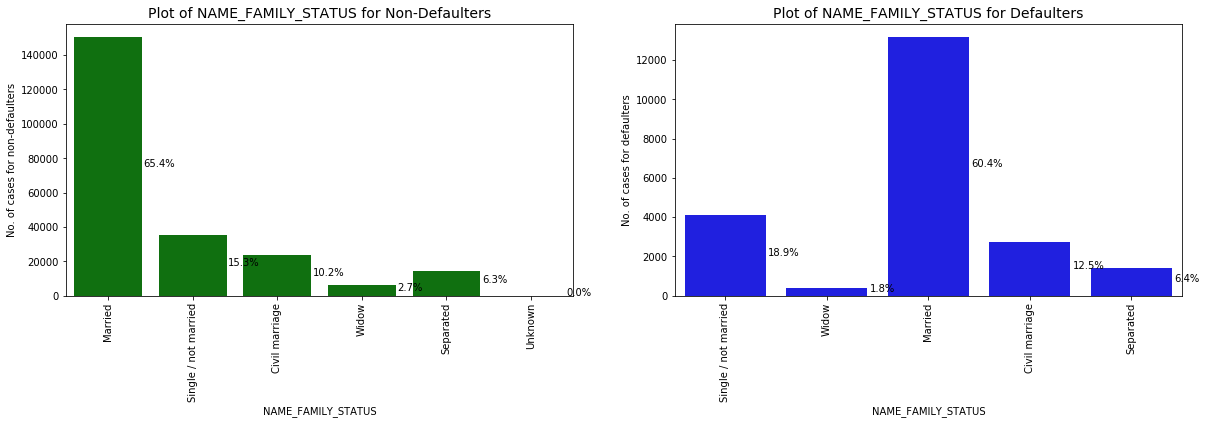

In [60]:
func_plot('NAME_FAMILY_STATUS')   

`Conclusion:`<br>
Single/not married and  Civil marriage cases are more in group of people who tend to default as compared to other group.
              

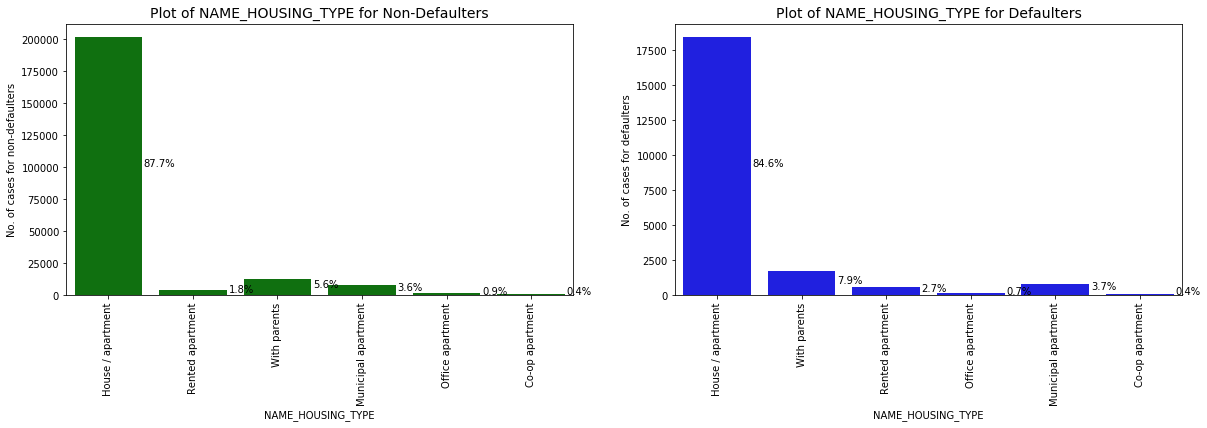

In [61]:
func_plot('NAME_HOUSING_TYPE')

`Conclusion:`
1. Applicants living with parents or those in rented appartments tend to default.

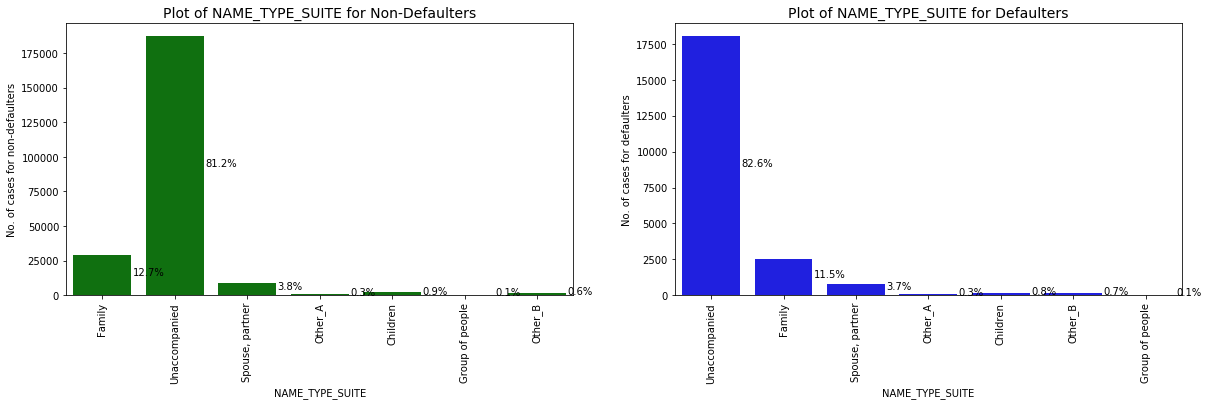

In [62]:
func_plot('NAME_TYPE_SUITE')

`Conclusion:`<br> Not seeing any impact as such. 

##### Ordered Categorical Data

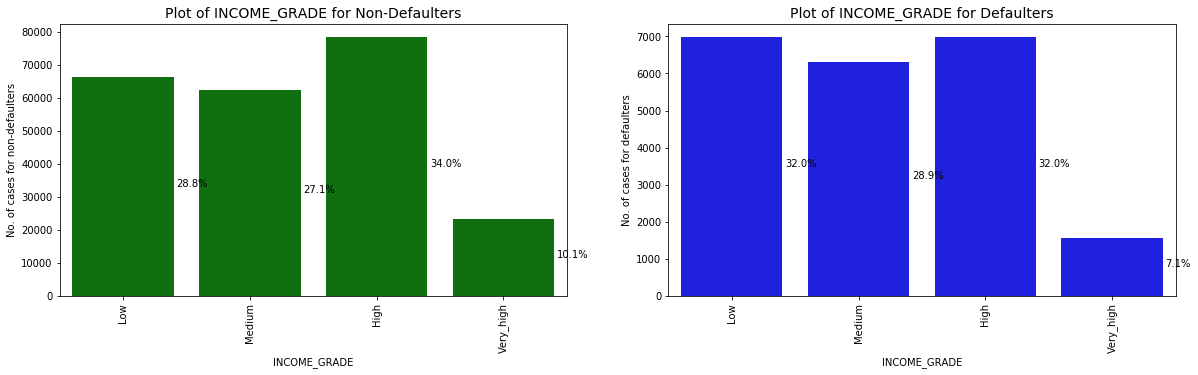

In [63]:
func_plot('INCOME_GRADE')

`Conclusion:`<br> Proportion of Clients with low and medium income range is higher in defaulters as compared to non defaulters.

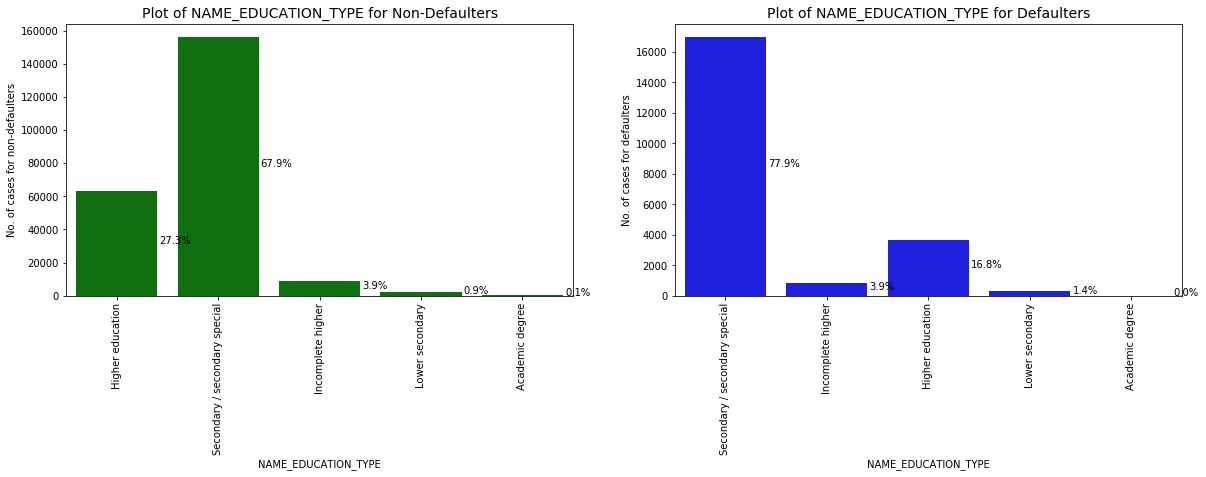

In [64]:
func_plot('NAME_EDUCATION_TYPE')

`Conclusion: `
1. Proportion of Secondary,Incomplete higher,Lower secondary is high in defaulters dataset.
2. It is evident that higher the education lower chances to be present in defaulters dataset.
             

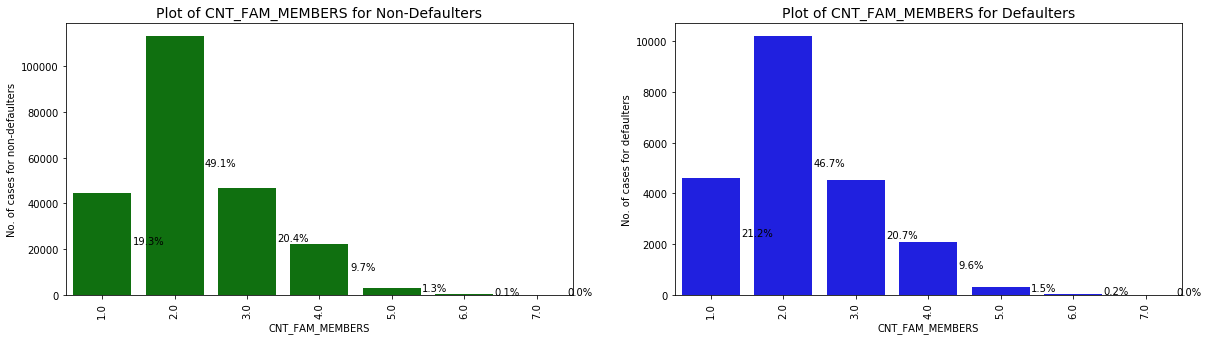

In [65]:
func_plot('CNT_FAM_MEMBERS')

`Conclusion:`<br>
Proportion for higher count of chidlren is more in defaulted population as compared to non defaulted and it seems as count of family members increases chances to come under defaulter dataset also increases.

In [66]:
import warnings
warnings.filterwarnings("ignore")

# defining function for plotting contnous variables
def fun_plotcont(feature):
    target=[0,1]
    for i in target:
        subset=application_data[application_data['TARGET']==i]
        str1= "Target::"+ str(i)
        sns.distplot(subset[feature], hist=False, label=str1)
    plt.figure(figsize=(15,5))
    plt.subplot(1, 2, 1)   
    app_data_t0[feature].plot.hist()
    plt.title('Distribution for Non-Defaulters', fontsize=14)
    plt.xlabel(feature)   
    plt.subplot(1, 2, 2)    
    app_data_t1[feature].plot.hist()
    plt.title('Distribution for Defaulters', fontsize=14)
    plt.xlabel(feature)    
    plt.show()

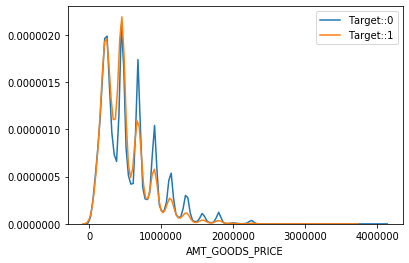

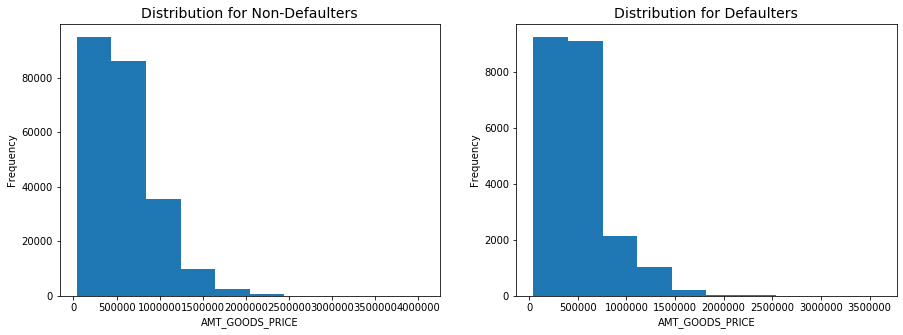

In [67]:
fun_plotcont('AMT_GOODS_PRICE')

`Conclusion:`

AMT_GOODS_PRICE stands for consumer loans it is the price of the goods for which the loan is given.
Defaults are higher if price of the goods is in lower range i.e. between 0 to 500,000. 

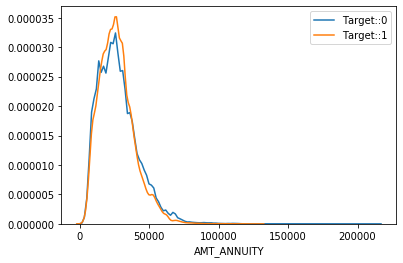

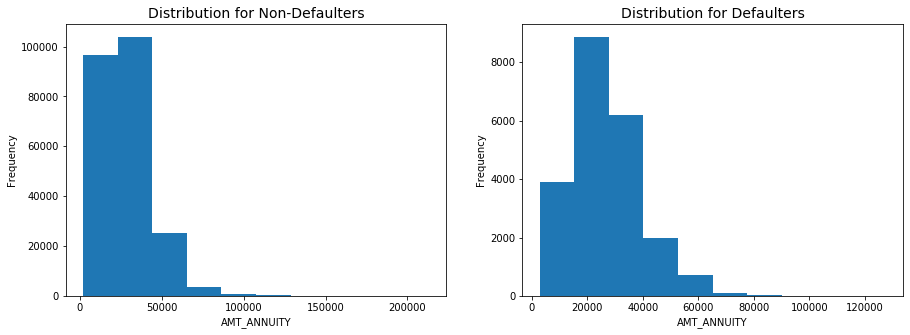

In [68]:
fun_plotcont('AMT_ANNUITY')

`Conclusion:`

AMT_ANNUITY is a fixed sum of money paid to someone each year. From above plot,it is evident that defaults are more  if EMI lies in range 20000 to 40000.

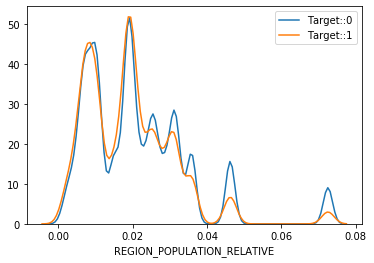

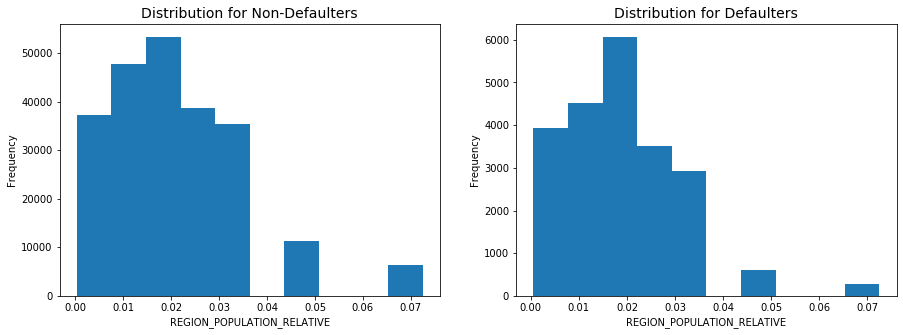

In [69]:
fun_plotcont('REGION_POPULATION_RELATIVE')

`Conclusion:` <br>Region_population_relative is Normalized population of region where client lives (higher number means the client lives in more populated region). From above plot, it is clear that defaulters are less in dense region (i.e. in more populted region).

## Bivariate Analysis::
***Deals with the following three subcategories::***
1. Continuous - Continuous
2. Continuous- Categorical
3. Categorical-Categorical

#### Continuous-Continuous 


In [70]:
# defining function for plotting contnous variables
def fun_heatmap_plot(corr_matrix):
    sns.set(font_scale=0.7)
    plt.figure(figsize=(10, 7))
    ax = sns.heatmap(
    corr_matrix,
    cmap=sns.diverging_palette(20, 120, n=100),linewidths=.1,
    square=True
    )
    ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

 ***Find correlation for numerical columns for both case, i.e 0 and 1.<br> `Target 0` : Correlation Calculation and Heat Map***

In [71]:
app_data_t0_num=app_data_t0.select_dtypes(include=['float64','int64'])
app_data_t1_num=app_data_t1.select_dtypes(include=['float64','int64'])

In [72]:
app_data_t0_num.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,EMPLOYED_YRS
1,100003,0,0,1293502.5,35698.5,1129500.0,0.003541,-1186.0,-291,2.0,1,1,11,0,0,0,0,0,0,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,-3.25
2,100004,0,0,135000.0,6750.0,135000.0,0.010032,-4260.0,-2531,1.0,2,2,9,0,0,0,0,0,0,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,-0.62
3,100006,0,0,312682.5,29686.5,297000.0,0.008019,-9833.0,-2437,2.0,2,2,17,0,0,0,0,0,0,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,-8.33
4,100007,0,0,513000.0,21865.5,513000.0,0.028663,-4311.0,-3458,1.0,2,2,11,0,0,0,0,1,1,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,-8.32
5,100008,0,0,490495.5,27517.5,454500.0,0.035792,-4970.0,-477,2.0,2,2,16,0,0,0,0,0,0,0.354225,0.621226,0.0,0.0,0.0,0.0,-2536.0,-4.35


In [73]:
app_data_t0_num.shape

(230230, 27)

In [74]:
app_data_t0_num.drop(["SK_ID_CURR","TARGET"], axis=1, inplace=True)

In [75]:
app_data_t0_num.shape

(230230, 25)

In [76]:
corr_matrix_0=app_data_t0_num.corr()
corr_matrix_0

,CNT_CHILDREN,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,EMPLOYED_YRS
CNT_CHILDREN,1.000000,-0.018605,-0.008003,-0.022197,-0.030439,0.164067,-0.118666,0.892056,0.037664,0.037171,-0.033105,-0.023296,-0.016529,-0.006761,-0.001515,0.010450,0.018613,-0.026279,-0.015281,0.019571,0.002990,0.019262,0.002052,-0.002304,0.063270
AMT_CREDIT,-0.018605,1.000000,0.764568,0.986708,0.103504,-0.015266,-0.034661,0.037236,-0.106346,-0.114958,0.040344,0.020415,0.050124,0.051880,-0.037651,-0.038483,-0.014754,0.135854,0.056646,-0.003624,-0.022117,-0.003590,-0.024185,-0.070232,-0.087371
AMT_ANNUITY,-0.008003,0.764568,1.000000,0.768822,0.121941,0.009695,-0.025432,0.041741,-0.132321,-0.145485,0.034094,0.038650,0.075470,0.071858,-0.019235,-0.028877,-0.013945,0.127227,0.046254,-0.015974,-0.023177,-0.015772,-0.024125,-0.062541,-0.052242
AMT_GOODS_PRICE,-0.022197,0.986708,0.768822,1.000000,0.106627,-0.011940,-0.036424,0.035410,-0.107255,-0.115197,0.049952,0.022897,0.051548,0.052194,-0.037096,-0.039220,-0.015715,0.142327,0.058922,-0.003757,-0.023346,-0.003764,-0.025008,-0.072272,-0.088512
REGION_POPULATION_RELATIVE,-0.030439,0.103504,0.121941,0.106627,1.000000,-0.059676,-0.003936,-0.028852,-0.543255,-0.540733,0.174710,-0.003235,0.065710,0.092212,-0.053645,-0.049416,-0.017036,0.207047,-0.013436,-0.013705,0.005029,-0.013181,0.000659,-0.043469,0.008750
DAYS_REGISTRATION,0.164067,-0.015266,0.009695,-0.011940,-0.059676,1.000000,0.029936,0.156341,0.094089,0.086631,-0.031498,0.020628,0.017670,0.009384,0.047277,0.055322,0.031402,-0.071690,-0.089200,0.016285,0.007889,0.016098,0.008130,0.072142,0.172096
DAYS_ID_PUBLISH,-0.118666,-0.034661,-0.025432,-0.036424,-0.003936,0.029936,1.000000,-0.110338,0.003571,0.001257,0.005431,0.026776,0.021057,0.009073,0.053443,0.033130,0.001817,-0.059602,-0.100810,-0.008799,0.008666,-0.009315,0.010247,0.104183,0.086694
CNT_FAM_MEMBERS,0.892056,0.037236,0.041741,0.035410,-0.028852,0.156341,-0.110338,1.000000,0.041607,0.042571,-0.036610,-0.027625,-0.021473,-0.009249,-0.009039,0.013138,0.029168,-0.009918,0.001257,0.027395,0.001252,0.027128,-0.001156,-0.025411,0.031450
REGION_RATING_CLIENT,0.037664,-0.106346,-0.132321,-0.107255,-0.543255,0.094089,0.003571,0.041607,1.000000,0.949494,-0.278743,-0.044200,-0.153879,-0.161278,0.039354,0.016772,-0.014231,-0.295565,-0.004192,0.037601,0.016033,0.037227,0.018467,0.022992,-0.017507
REGION_RATING_CLIENT_W_CITY,0.037171,-0.114958,-0.145485,-0.115197,-0.540733,0.086631,0.001257,0.042571,0.949494,1.000000,-0.257115,-0.040457,-0.146290,-0.154489,0.050692,0.039661,0.004761,-0.290169,-0.002727,0.033052,0.013977,0.032720,0.017097,0.022473,-0.015962


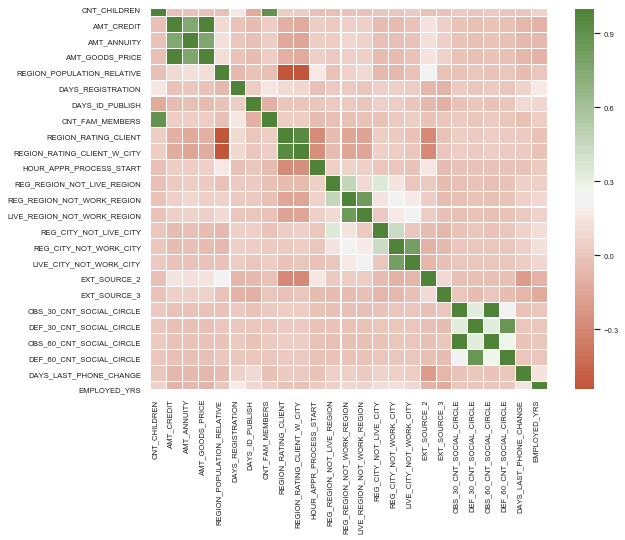

In [77]:
#Heatmap for Target 0 i.e. Non Defaulters.
fun_heatmap_plot(corr_matrix_0)

In [78]:
np.ones(corr_matrix_0.shape)
np.triu(np.ones(corr_matrix_0.shape),k=0)
corr_matrix_0=corr_matrix_0.where(np.triu(np.ones(corr_matrix_0.shape),k=1).astype(np.bool))
CM_0=corr_matrix_0.unstack().reset_index()
CM_0.columns= ['VAR1','VAR2','Correlation']
CM_0=CM_0.dropna(subset=['Correlation'])
CM_0=CM_0[CM_0.VAR1 != CM_0.VAR2]
CM_0.Correlation=abs(CM_0.Correlation)
CM_0.sort_values('Correlation',ascending=False)[1:10]

,VAR1,VAR2,Correlation
76,AMT_GOODS_PRICE,AMT_CREDIT,0.986708
233,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.949494
175,CNT_FAM_MEMBERS,CNT_CHILDREN,0.892056
570,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.861444
337,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.860510
415,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,0.820822
77,AMT_GOODS_PRICE,AMT_ANNUITY,0.768822
51,AMT_ANNUITY,AMT_CREDIT,0.764568
204,REGION_RATING_CLIENT,REGION_POPULATION_RELATIVE,0.543255


***Target 1: Correlation Calculation and Heat Map***

In [79]:
app_data_t1_num=app_data_t1.select_dtypes(include=['float64','int64'])

In [80]:
app_data_t1_num.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,EMPLOYED_YRS
0,100002,1,0,406597.5,24700.5,351000.0,0.018801,-3648.0,-2120,1.0,2,2,10,0,0,0,0,0,0,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,-1.75
26,100031,1,0,979992.0,27076.5,702000.0,0.018029,-6573.0,-1827,1.0,3,2,9,0,0,0,0,0,0,0.548477,0.190706,10.0,1.0,10.0,0.0,-161.0,-7.20
40,100047,1,0,1193580.0,35028.0,855000.0,0.025164,-1182.0,-1029,2.0,2,2,9,0,0,0,0,0,0,0.306841,0.320163,0.0,0.0,0.0,0.0,-1075.0,-3.46
42,100049,1,0,288873.0,16258.5,238500.0,0.007305,-45.0,-4409,2.0,3,3,11,0,0,0,0,0,0,0.674203,0.399676,1.0,0.0,1.0,0.0,-1480.0,-9.85
94,100112,1,0,953460.0,64107.0,900000.0,0.030755,-4802.0,-1038,1.0,2,2,13,0,0,0,0,1,1,0.432340,0.077499,0.0,0.0,0.0,0.0,-591.0,-5.52


In [81]:
app_data_t1_num.drop(['TARGET','SK_ID_CURR'],axis=1,inplace=True)

In [82]:
app_data_t1_num.shape

(21826, 25)

In [83]:
app_data_t1_num.head()

,CNT_CHILDREN,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,EMPLOYED_YRS
0,0,406597.5,24700.5,351000.0,0.018801,-3648.0,-2120,1.0,2,2,10,0,0,0,0,0,0,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,-1.75
26,0,979992.0,27076.5,702000.0,0.018029,-6573.0,-1827,1.0,3,2,9,0,0,0,0,0,0,0.548477,0.190706,10.0,1.0,10.0,0.0,-161.0,-7.20
40,0,1193580.0,35028.0,855000.0,0.025164,-1182.0,-1029,2.0,2,2,9,0,0,0,0,0,0,0.306841,0.320163,0.0,0.0,0.0,0.0,-1075.0,-3.46
42,0,288873.0,16258.5,238500.0,0.007305,-45.0,-4409,2.0,3,3,11,0,0,0,0,0,0,0.674203,0.399676,1.0,0.0,1.0,0.0,-1480.0,-9.85
94,0,953460.0,64107.0,900000.0,0.030755,-4802.0,-1038,1.0,2,2,13,0,0,0,0,1,1,0.432340,0.077499,0.0,0.0,0.0,0.0,-591.0,-5.52


In [84]:
corr_matrix_1=app_data_t1_num.corr()

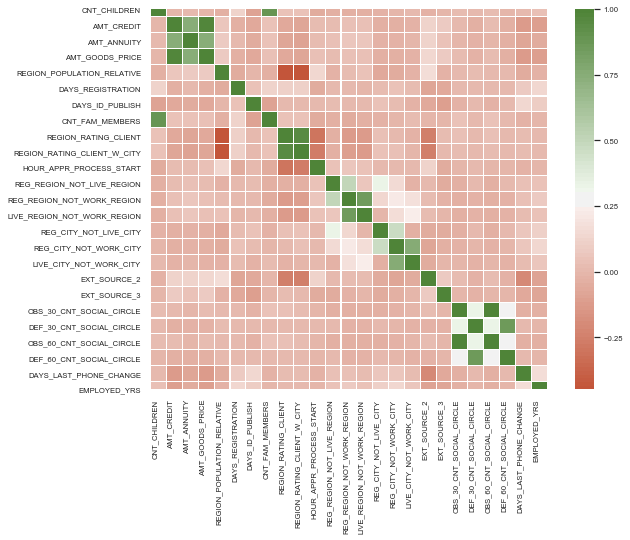

In [85]:
#Heatmap for Target 0 i.e. Non Defaulters.
fun_heatmap_plot(corr_matrix_1)

In [86]:
np.ones(corr_matrix_1.shape)
np.triu(np.ones(corr_matrix_1.shape),k=0)
corr_matrix_1=corr_matrix_1.where(np.triu(np.ones(corr_matrix_1.shape),k=1).astype(np.bool))
CM_1=corr_matrix_1.unstack().reset_index()
CM_1.columns= ['VAR1','VAR2','Correlation']
CM_1=CM_1.dropna(subset=['Correlation'])
CM_1=CM_1[CM_1.VAR1 != CM_1.VAR2]
CM_1.Correlation=abs(CM_1.Correlation)
CM_1.sort_values('Correlation',ascending=False)[1:10]

,VAR1,VAR2,Correlation
76,AMT_GOODS_PRICE,AMT_CREDIT,0.982800
233,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.956530
175,CNT_FAM_MEMBERS,CNT_CHILDREN,0.891445
570,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.867943
337,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.846868
415,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,0.768153
77,AMT_GOODS_PRICE,AMT_ANNUITY,0.749436
51,AMT_ANNUITY,AMT_CREDIT,0.748774
311,REG_REGION_NOT_WORK_REGION,REG_REGION_NOT_LIVE_REGION,0.506742


`Compared Top 10 Correlation between defaulter and Non-Defaulter data set and found that correlation pair variables are  same in both`

## Continuous-Categorical
***Variables Used***
- AMT_ANNUITY  Vs  each of NAME_CONTRACT_TYPE,CNT_CHILDREN, NAME_FAMILY_STATUS,INCOME_GRADE, OCCUPATION_TYPE,NAME_EDUCATION_TYPE<br>



In [87]:
cate_features=["CNT_CHILDREN","INCOME_GRADE","NAME_EDUCATION_TYPE","AGE_BY_DECADE","NAME_CONTRACT_TYPE"]

## TARGET 1::

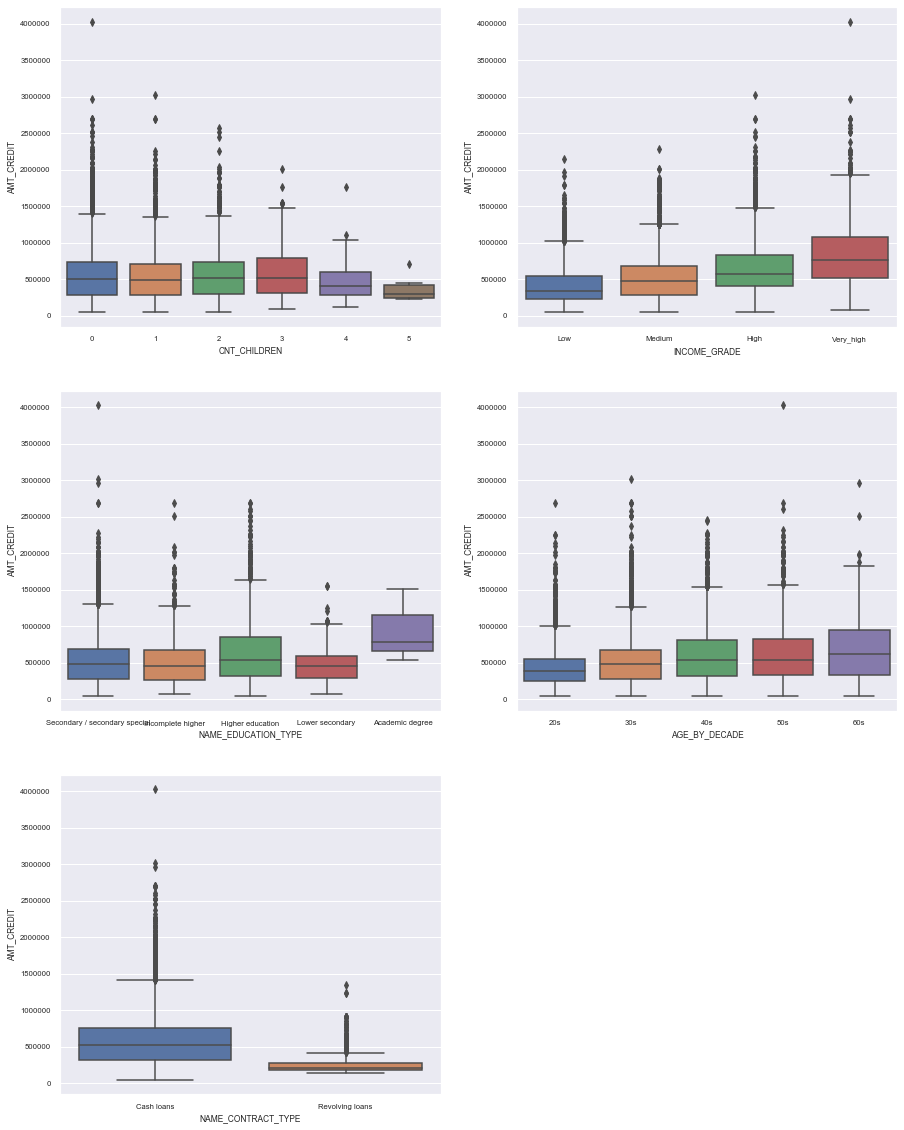

In [88]:
plt.figure(figsize = (15, 20))
for i in enumerate(cate_features):
    plt.subplot(3, 2, i[0]+1)
    sns.boxplot(x = i[1], y = 'AMT_CREDIT', data =app_data_t1)
   

`Conclusion:` 
1. AMT_CREDIT for Revolving loans is much on lower side than cash loans in case of defaulters.
2. AMT_CREDIT Range for defaulters is the max in their 60s.
3. More people in the Married category of NAME_FAMILY_STATUS tend to appy for higher AMT_CREDIT.
3. Very_high INCOME_GRADE defaulters tend to apply for the higher AMT_CREDIT.

## Target 0::

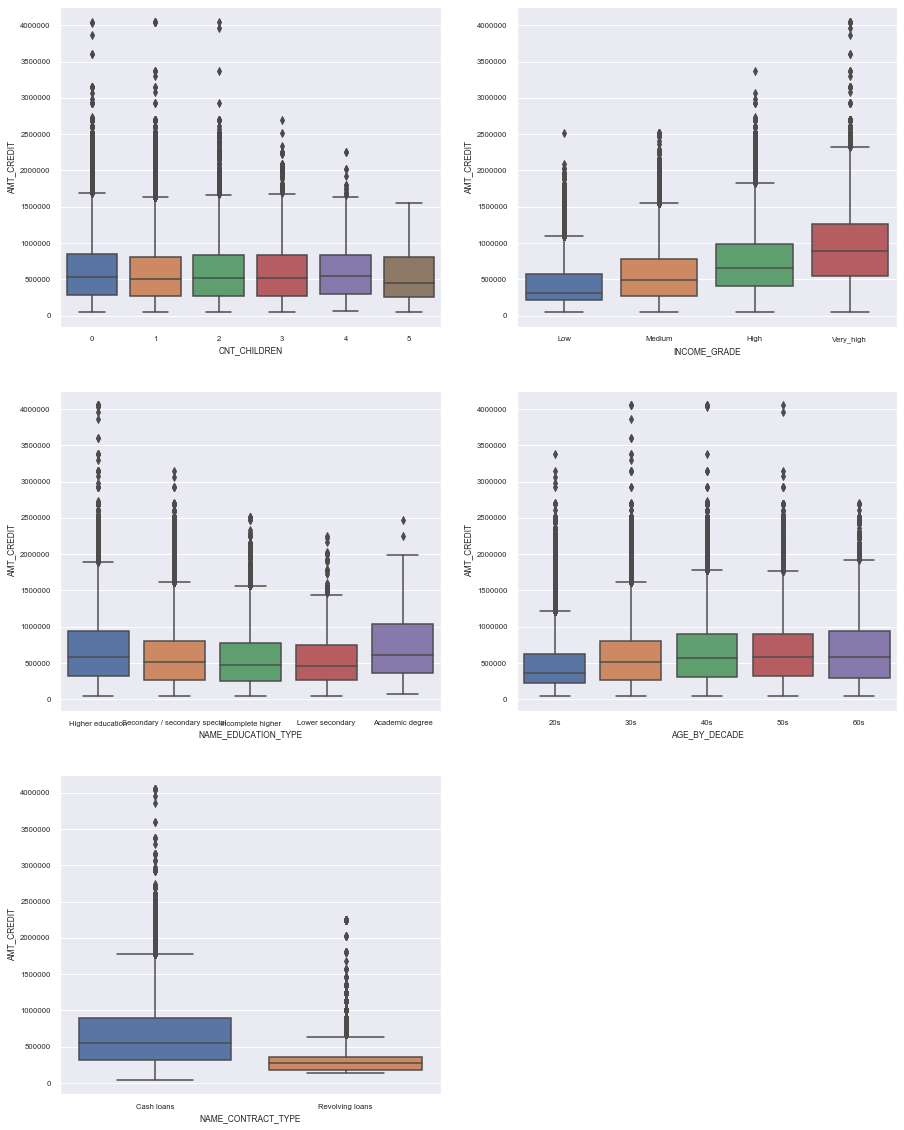

In [89]:
plt.figure(figsize = (15, 20))
for i in enumerate(cate_features):
    plt.subplot(3, 2, i[0]+1)
    sns.boxplot(x = i[1], y = 'AMT_CREDIT', data =app_data_t0)

1. AMT_CREDIT for Revolving loans for non defaulters follow the same trend as earlier group i.e; much on lower side than cash loans.
2. Very_high INCOME_GRADE tend to apply for the higher AMT_CREDIT.

### Categorical-Categorical Variables
*** Variables Used ***
-  NAME_FAMILY_STATUS Vs CNT_CHILDREN
-  INCOME_GRADE Vs AGE_BY_DECADE
-  CODE_GENDER Vs AGE_BY_DECADE
-  INCOME_GRADE Vs CNT_CHILDREN
-  NAME_EDUCATION_TYPE Vs CNT_CHILDREN


In [90]:
def cate_cate(feature1,feature2):
    plt.figure(figsize=(15,7))
    plt.subplot(121)
    plt.title('Plot for Non-Defaulters')
    sns.countplot(x = feature1, hue = feature2, data = app_data_t0)
    plt.xticks(rotation = 90)
    plt.subplot(122)
    plt.title('Plot for Defaulters')
    sns.countplot(x =feature1, hue = feature2, data = app_data_t1)
    plt.xticks(rotation = 90)
    plt.show()

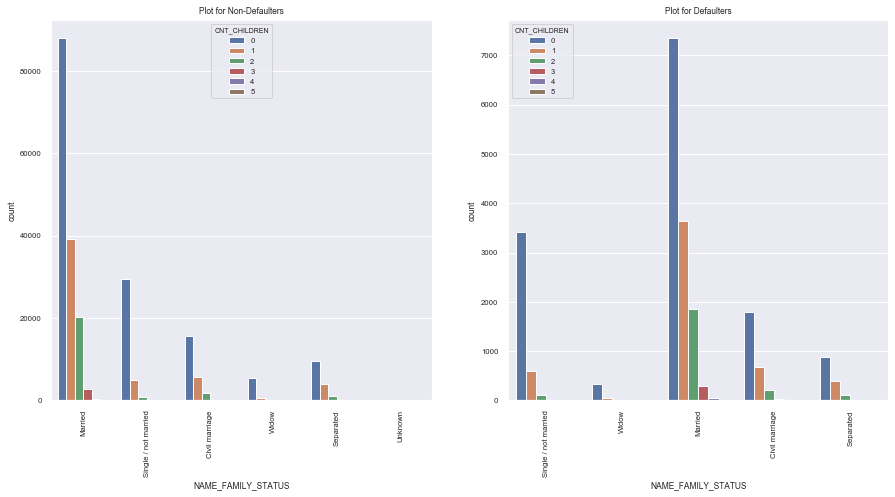

In [91]:
cate_cate("NAME_FAMILY_STATUS","CNT_CHILDREN")

`Conclusion:`<br>Married people with more children tend to default more.

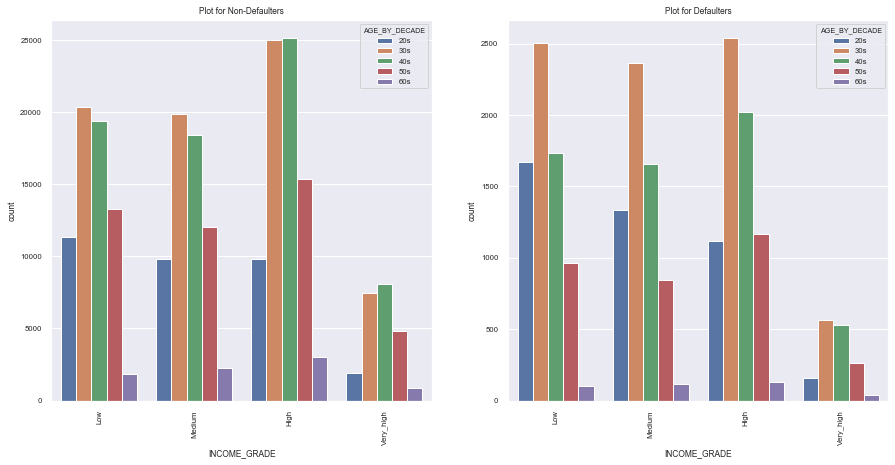

In [92]:
cate_cate("INCOME_GRADE","AGE_BY_DECADE")

Since, most of the applicants lie in their 30s. People who tend to default more lie in the same age band.
Alos, people in their 40s are more reliable to pay off their loans(esp in High and Very-High INCOME_GRADE).

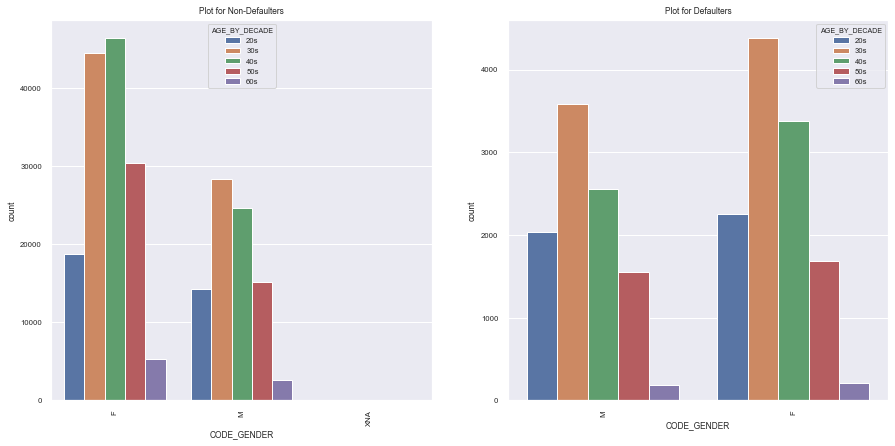

In [93]:
cate_cate("CODE_GENDER","AGE_BY_DECADE")

`Conclusion:`
1. Females in their 40s and Males in Males in their 30s are more likely to pay off their loans.
2. Males and Females in both their 30s tend to default more.
3. Both males and females in their 60s tend to default lesser in comparison to other age groups.

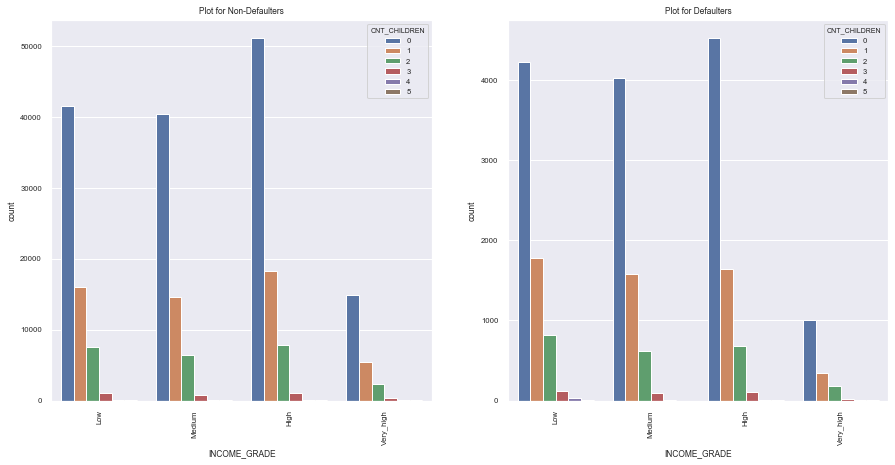

In [94]:
cate_cate("INCOME_GRADE", "CNT_CHILDREN")

`Conclusion:`<br>
1. Low income groups are to be under scanner irrespective of the count of children. 
2. With one exception, where applicants with no child in High Income grade outlays the count of Low Income Grade. 

# loading Previous application data

In [95]:
previous_application =pd.read_csv("Data_Download/previous_application.csv")

FileNotFoundError: [Errno 2] File b'Data_Download/previous_application.csv' does not exist: b'Data_Download/previous_application.csv'

In [ ]:
previous_application.head()

In [ ]:
previous_application.shape

In [ ]:
previous_application.info()

In [ ]:
#Getting the nas count of previous_application
prev_na=round(100*(previous_application.isnull().sum()/len(previous_application.index)),2)
prev_na.sort_values(ascending=False)

In [ ]:
#getting the list of columns where nas are more than 47%
prev_na_greater= prev_na[round(100*(previous_application.isnull().sum()/len(previous_application.index)),2)>47].to_frame().index.tolist()
prev_na_greater

In [ ]:
#Dropping the list of columns with more than 47% missing values
previous_application.drop(prev_na_greater, axis=1, inplace=True)

In [ ]:
# Merging the two application_data and previous_application dataframes
merged_application=pd.merge(application_data, previous_application, how="inner", on="SK_ID_CURR", suffixes=("_curr","_prev"))

In [ ]:
merged_application.head()

##  Analysis

### Univariate-Numerical

In [ ]:
def density_plot(feature):
    target=[0,1]
    plt.figure(figsize=(15,5))
    for i in target:
        subset=merged_application[merged_application['TARGET']==i]
        str1= "Target::"+ str(i)
        sns.distplot(subset[feature], hist=False, label=str1)

In [ ]:
density_plot("AMT_ANNUITY_prev")

Defaulters have higher probability of getting lower AMT_ANNUITY in the previous applications. This may be because of the lower amount of loan they have applied for.

In [ ]:
density_plot("AMT_CREDIT_prev")

Applicants who have defaulted in the current scenerio, earlier also applied for a smaller amout of loan. That is, defaulters tend to apply for a smaller loan amount in comparison to others who dont default.

In [ ]:
# Creating two differnet data frames with TARGET value 0 and 1
merged_application_0=pd.merge(app_data_t0, previous_application, how="inner", on="SK_ID_CURR", suffixes=("_curr","_prev"))
merged_application_1=pd.merge(app_data_t1, previous_application, how="inner", on="SK_ID_CURR", suffixes=("_curr","_prev"))

In [ ]:
def func_plot_merge(feature):
    plt.figure(figsize=(20,5))
    plt.subplot(1, 2, 1)   
    ax=sns.countplot(feature, data=merged_application_0,color='green')
    total = len(merged_application_0['%s' %feature])    
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))       
    plt.title('Plot of '+ '%s' %feature +' for Non-Defaulters', fontsize=1)
    plt.xlabel(feature)
    plt.xticks(rotation=90)
    plt.ylabel('No. of cases for non-defaulters')
    plt.subplot(1, 2, 2)
    ax=sns.countplot(feature, data=merged_application_1,color='blue')
    total = len(merged_application_1['%s' %feature])    
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))   
    plt.title('Plot of '+ '%s' %feature +' for Defaulters', fontsize=14)
    plt.xlabel(feature)
    plt.xticks(rotation=90)
    plt.ylabel('No. of cases for defaulters')
    plt.show()    

In [ ]:
func_plot_merge('NAME_CONTRACT_STATUS')

`Conclusion:`
1. Around 17.6% application with status 'Canceled' and 17.0% application with status 'Refused' are now in Non Defaulters group.
2. Also, from above plot it is evident that even previous approved cases are now in Default group and percentage is quite high i.e. 54.8%

In [ ]:
func_plot_merge('NAME_CLIENT_TYPE')

`Conclusion:`<br>In terms of default percent for current applications of clients with history of previous applications, We can see that repeated customers are also not repaying the loan. About 73.4% are repeater in default data set.

In [ ]:
func_plot_merge('NAME_PAYMENT_TYPE')

`Conclusion:`<br>

NAME_PAYMENT_TYPE means Payment method that client chose to pay for the previous application. From above plot, it is evident that most of the previous applications were paid with Cash through the bank.

func_plot_merge('CHANNEL_TYPE')

In [ ]:
func_plot_merge('CHANNEL_TYPE')

`Conclusion:`<br>

CHANNEL_TYPE is Through which channel we acquired the client on the previous application.
From above plot, it is evident that chances to default is more if channel type is 'credit and cash offices', 'AP+(Cash Loans)' or 'Contact Center'.

## Bivariate Analysis:: 

### Categorical Categorical::

In [ ]:
merged_application.groupby(['CHANNEL_TYPE'])['TARGET'].value_counts(normalize=True)

In [ ]:
plt.figure(figsize=(20,10))
merged_application.groupby(['CHANNEL_TYPE'])['TARGET'].mean().plot.barh(fontsize=15)
plt.show()

 `Conclusion:` <br>It is evident that applicants who used *AP+(Cash Loan)* as the CHANNEL_TYPE are the ones who default the most.This is followed by Contact Centre and Credit and cash offices.

In [ ]:
plt.figure(figsize=(15,7))
merged_application.groupby(['NAME_PAYMENT_TYPE'])['TARGET'].mean().plot.barh(fontsize=15)
plt.show()

`Conclusion:` People who have used "Cashless from the account of the employer" as the Payment Type are the most likely to default.

In [ ]:
merged_application.groupby(['NAME_PRODUCT_TYPE'])['TARGET'].mean().plot.barh()
plt.savefig("figure.png")
plt.show()


Out of the available count, most of them are walk-in applications.

In [ ]:
merged_application.groupby(['NAME_PORTFOLIO'])['TARGET'].mean().plot.barh()
plt.show()

Out of the available count, most of the previous applicants are for Cards.

In [ ]:
merged_application.groupby(['NAME_CLIENT_TYPE'])['TARGET'].mean().plot.barh()
plt.show()

Even if most of the defaulters are  New applicants, then also, Repeater applicantions are equally likely to default.

In [ ]:

merged_application.groupby(['CODE_REJECT_REASON'])['TARGET'].mean().plot.barh()
plt.show()

Out of the available/ applicable count, most of the defaulters had been previously rejected with a SCOFR Code. This implies this code of rejection has a significant impact on the future tendency of a person to default.